<a href="https://colab.research.google.com/github/awaisnazir08/Squash-Ball-Detection/blob/main/squash_ball_detection_with_validation_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun  4 08:48:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

In [4]:
%cd {HOME}

/content


In [5]:
from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="my_api_key")
project = rf.workspace("hemil").project("squash-ball-training")
version = project.version(3)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Squash-ball-training-3 in yolov8:: 100%|██████████| 8176/8176 [00:02<00:00, 3044.67it/s]


In [10]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 plots=True

100% 21.5M/21.5M [00:00<00:00, 262MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Squash-ball-training-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

/content


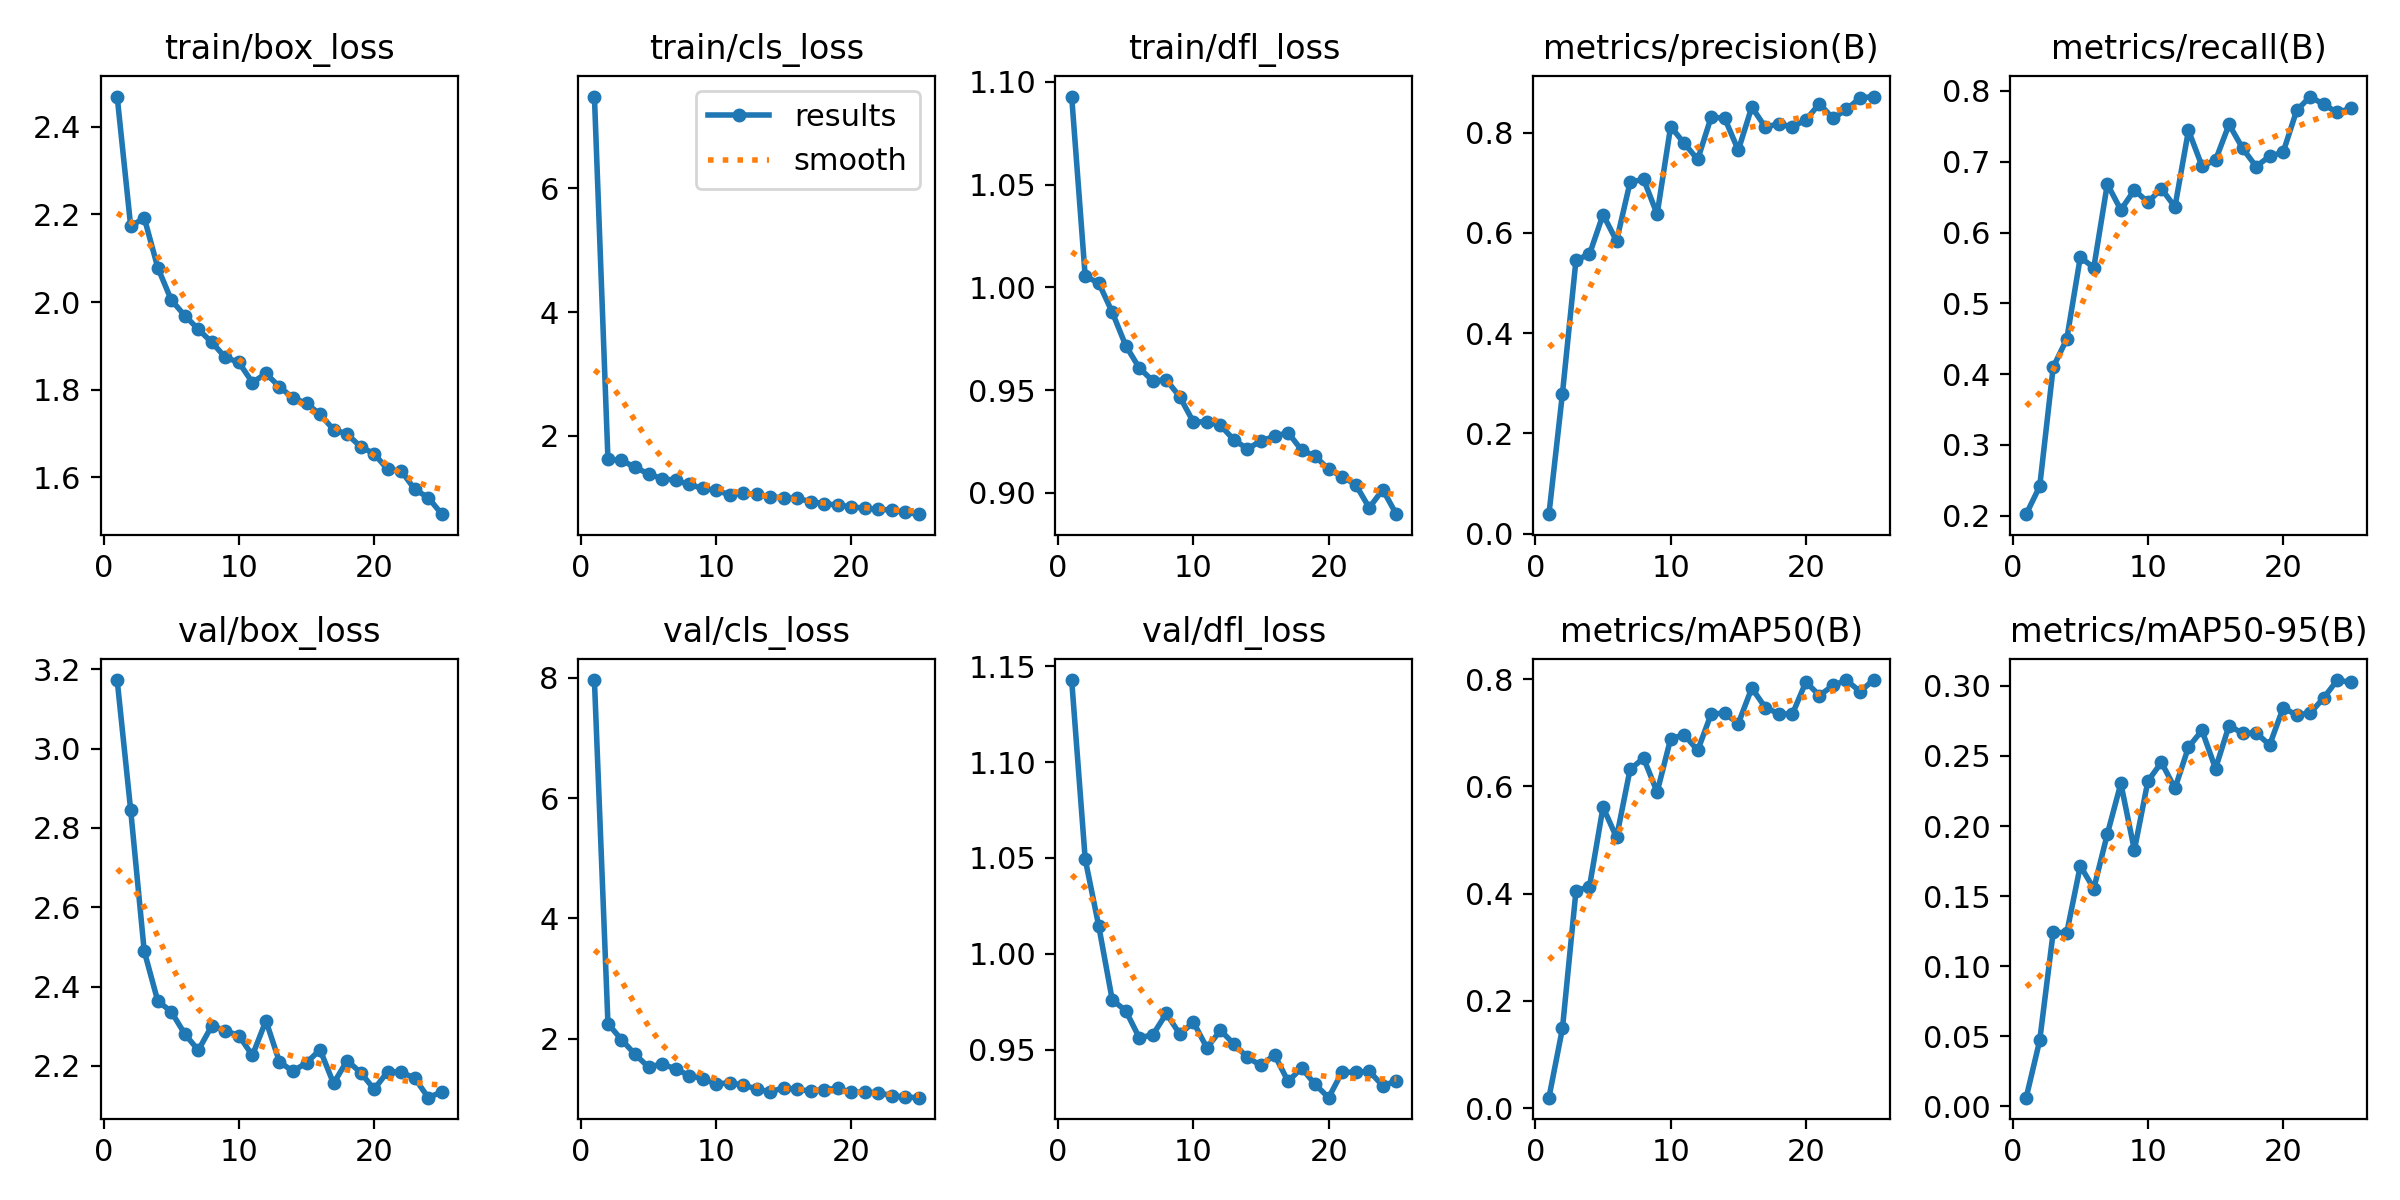

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

/content


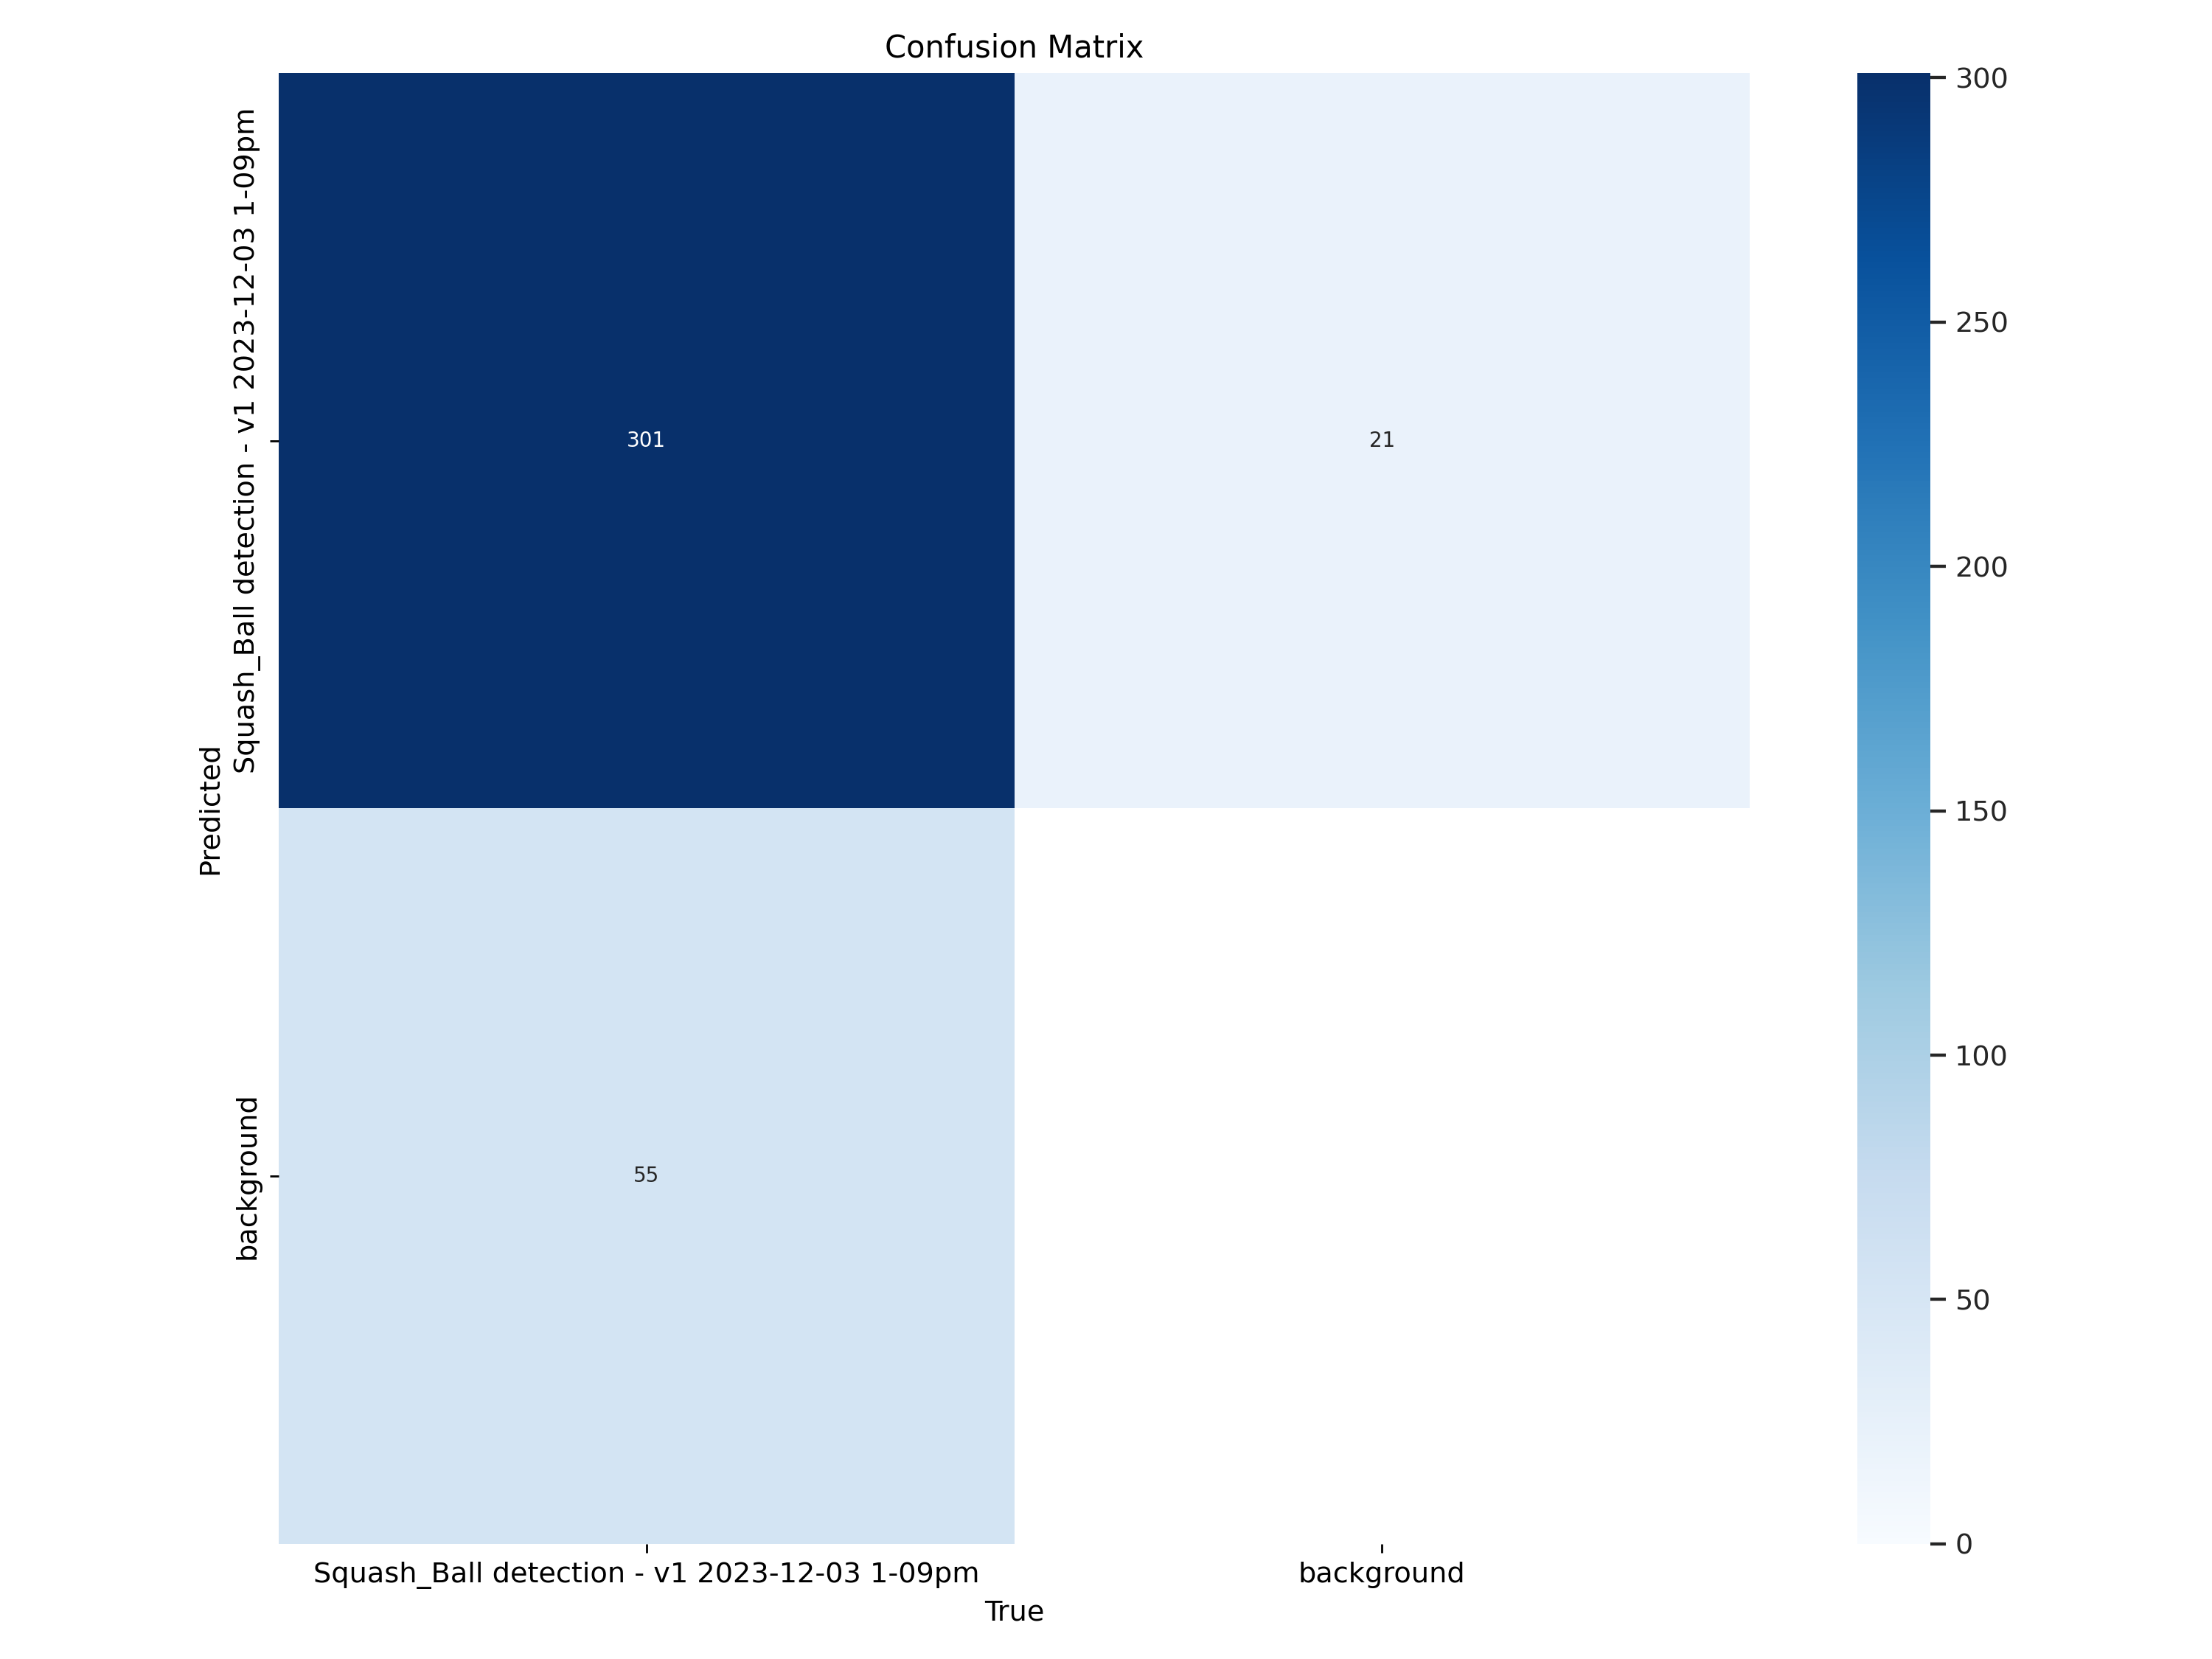

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

/content


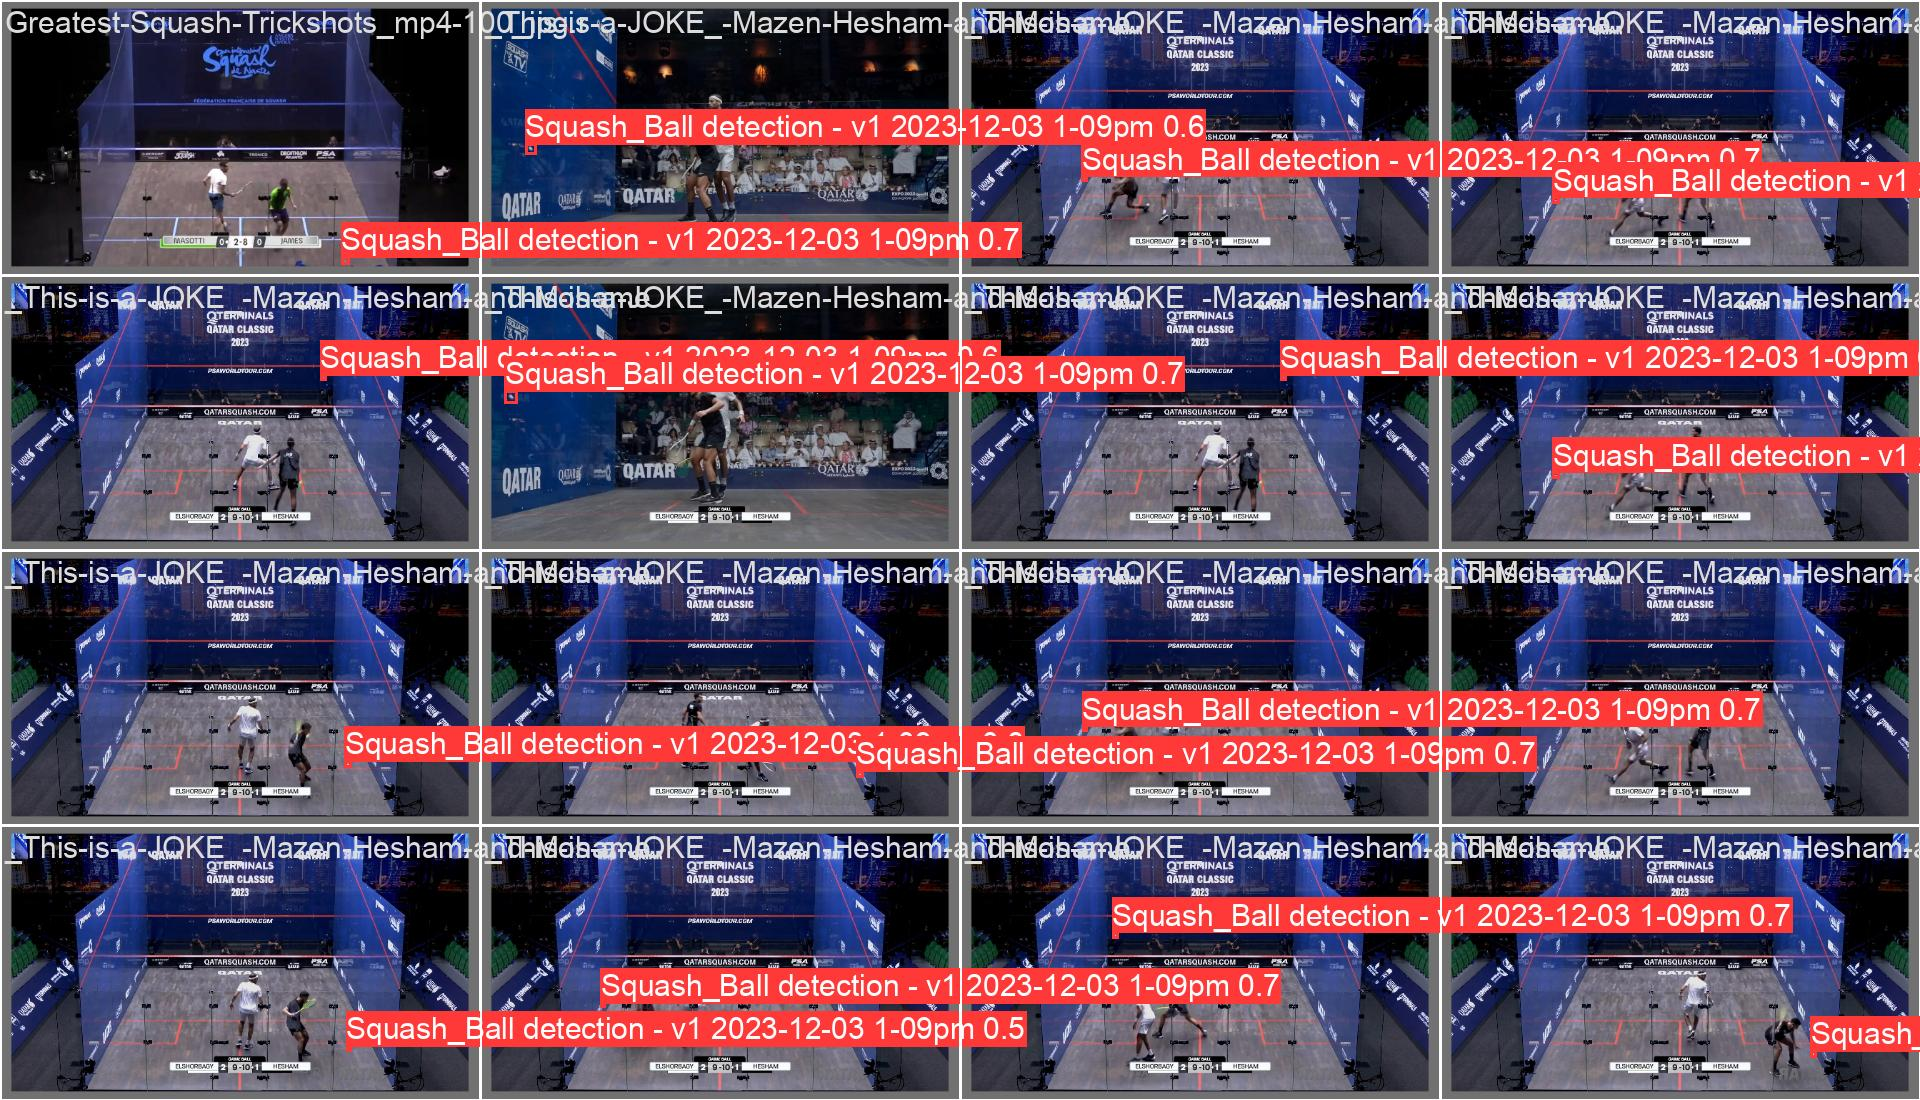

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


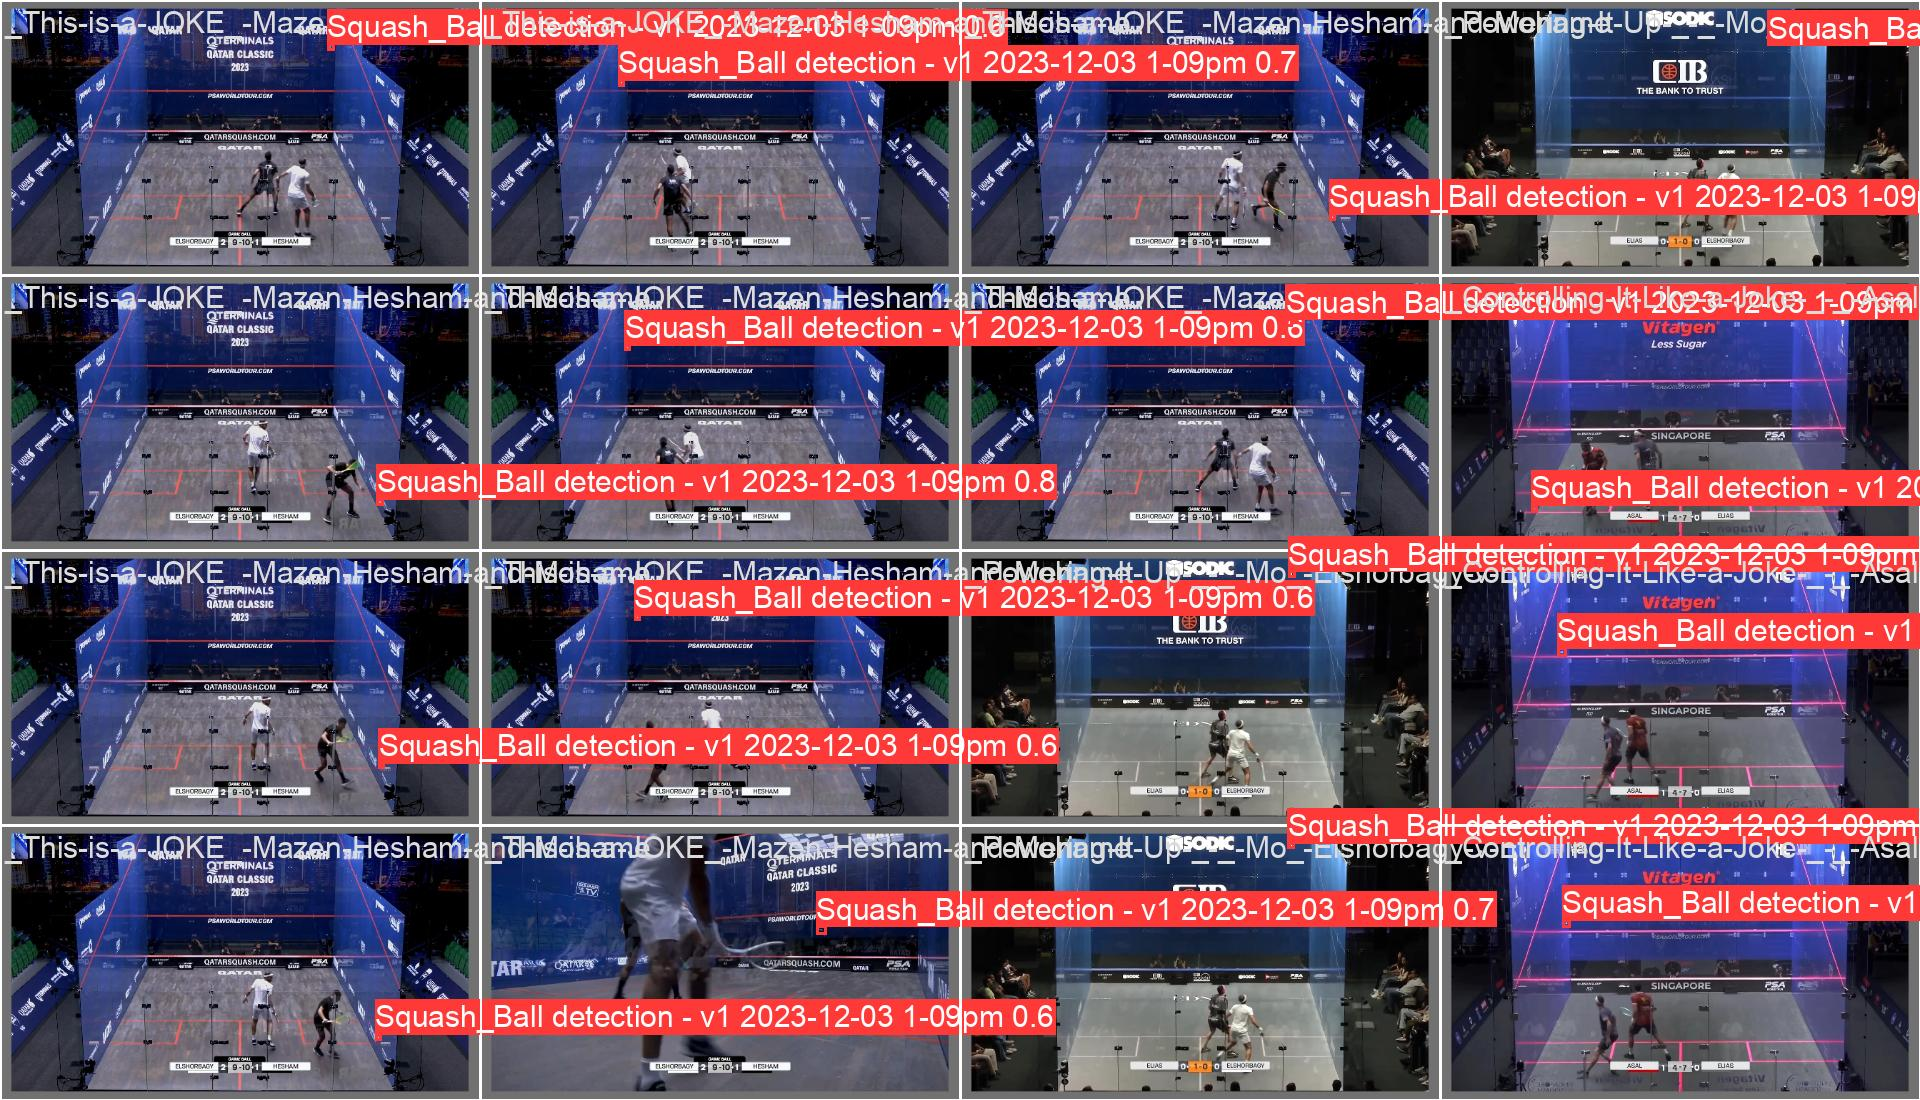

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


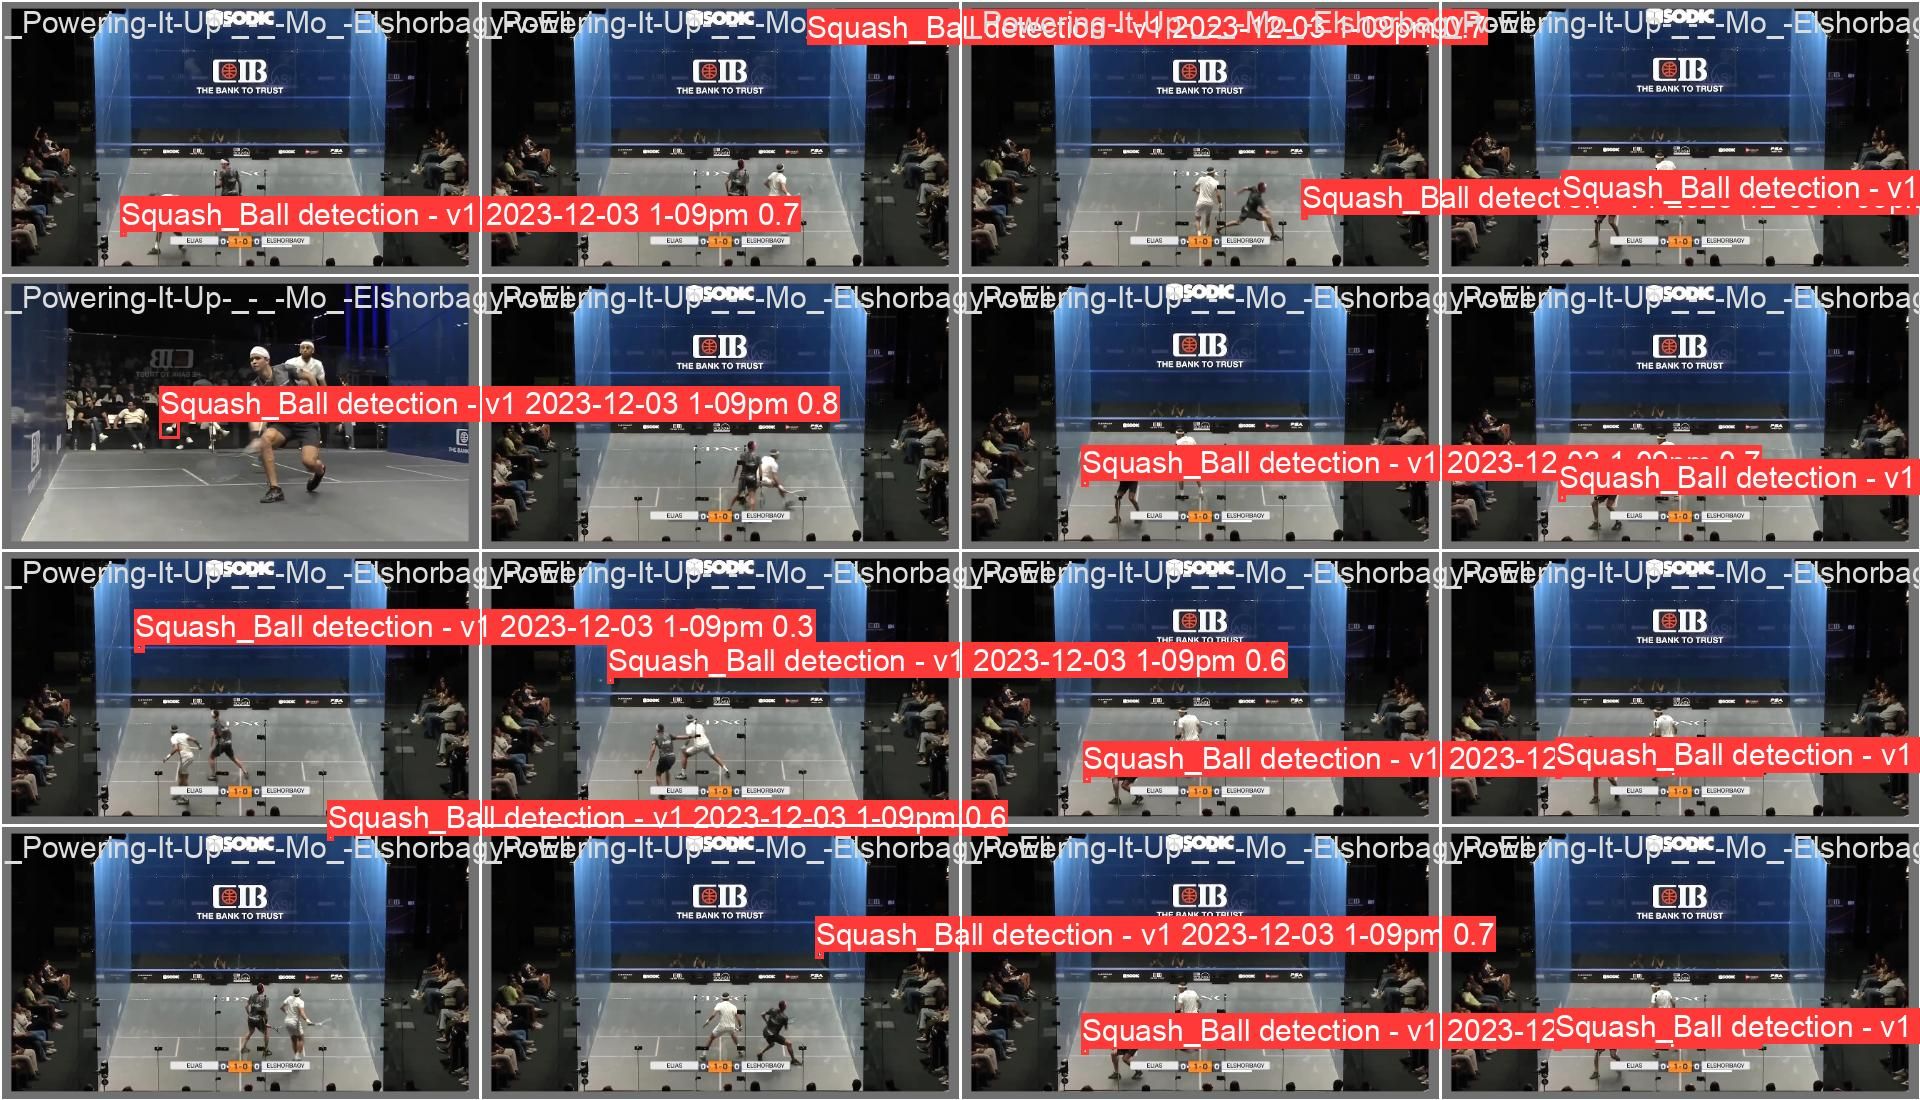

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Squash-ball-training-3/valid/labels.cache... 356 images, 0 backgrounds, 0 corrupt: 100% 356/356 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 356. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/23 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 23/23 [00:11<00:00,  1.98it/s]
                   all        356        356      0.842      0.762      0.771      0.294
Speed: 1.6ms preprocess, 6.3ms inf

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/176 /content/datasets/Squash-ball-training-3/test/images/Greatest-Squash-Trickshots_mp4-1010_jpg.rf.c2e52ad175c1424a85f3b2aaa8dfcd63.jpg: 384x640 1 Squash_Ball detection - v1 2023-12-03 1-09pm, 181.8ms
image 2/176 /content/datasets/Squash-ball-training-3/test/images/Greatest-Squash-Trickshots_mp4-1027_jpg.rf.b1009aa023472c1ba6660a03068b1a0a.jpg: 384x640 1 Squash_Ball detection - v1 2023-12-03 1-09pm, 10.7ms
image 3/176 /content/datasets/Squash-ball-training-3/test/images/Greatest-Squash-Trickshots_mp4-1036_jpg.rf.2ebf65bcc6dfa71ebf75d6c570f931df.jpg: 384x640 1 Squash_Ball detection - v1 2023-12-03 1-09pm, 10.7ms
image 4/176 /content/datasets/Squash-ball-training-3/test/images/Greatest-Squash-Trickshots_mp4-103_jpg.rf.1c118b63597f96b48fb6b6c2a869180c.jpg: 384x64

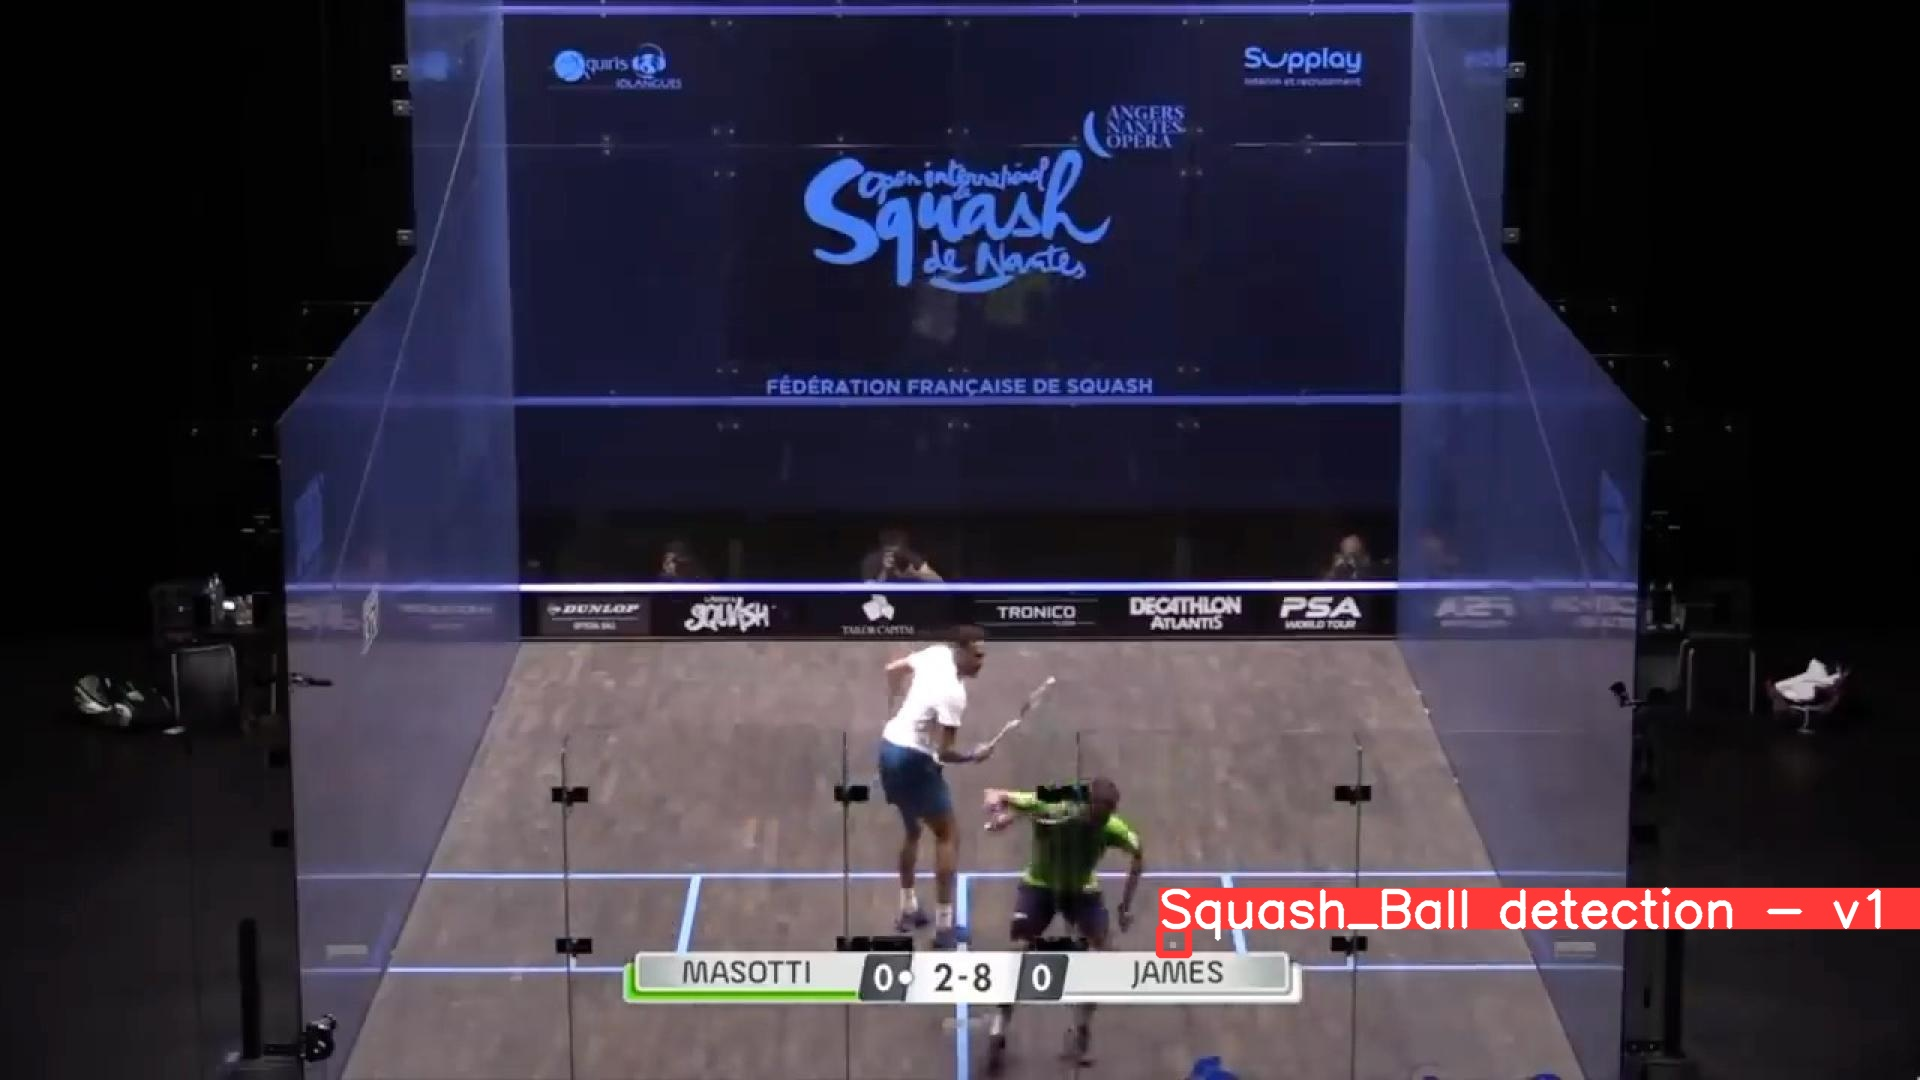

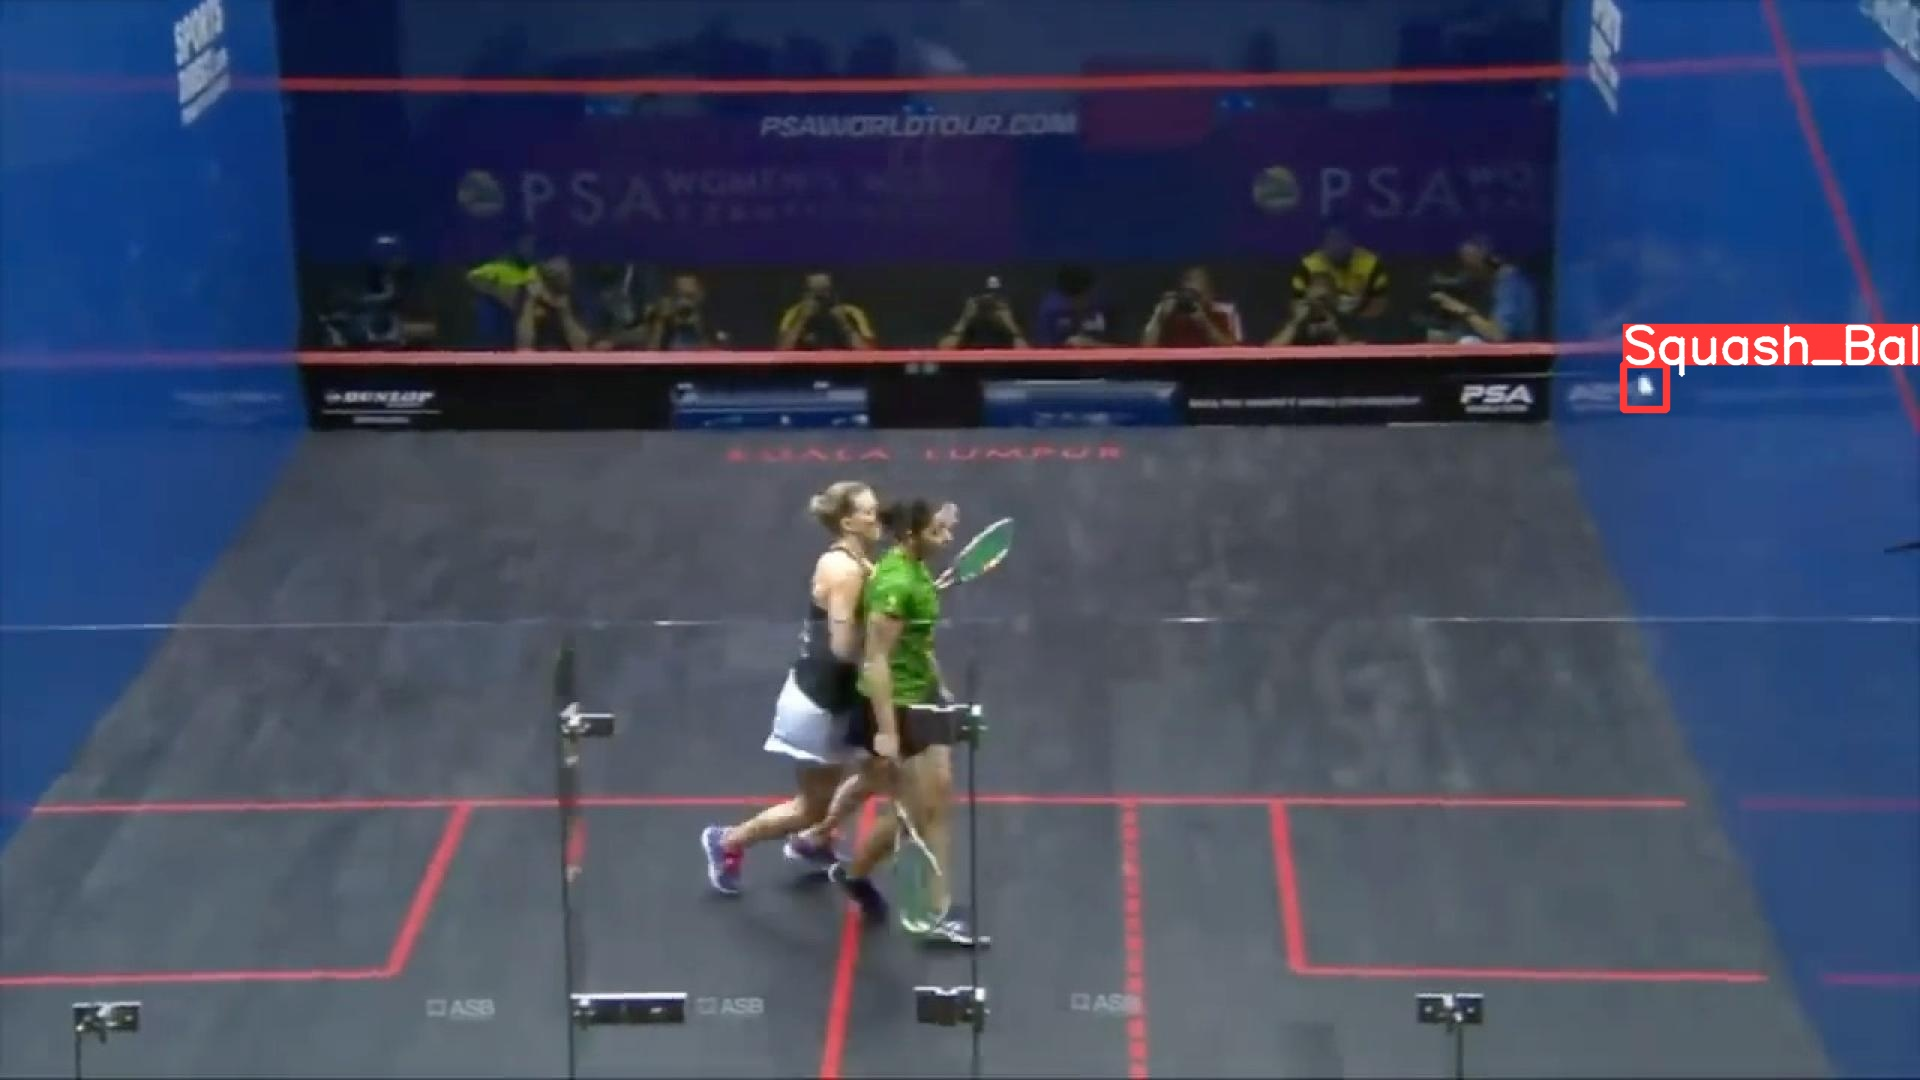

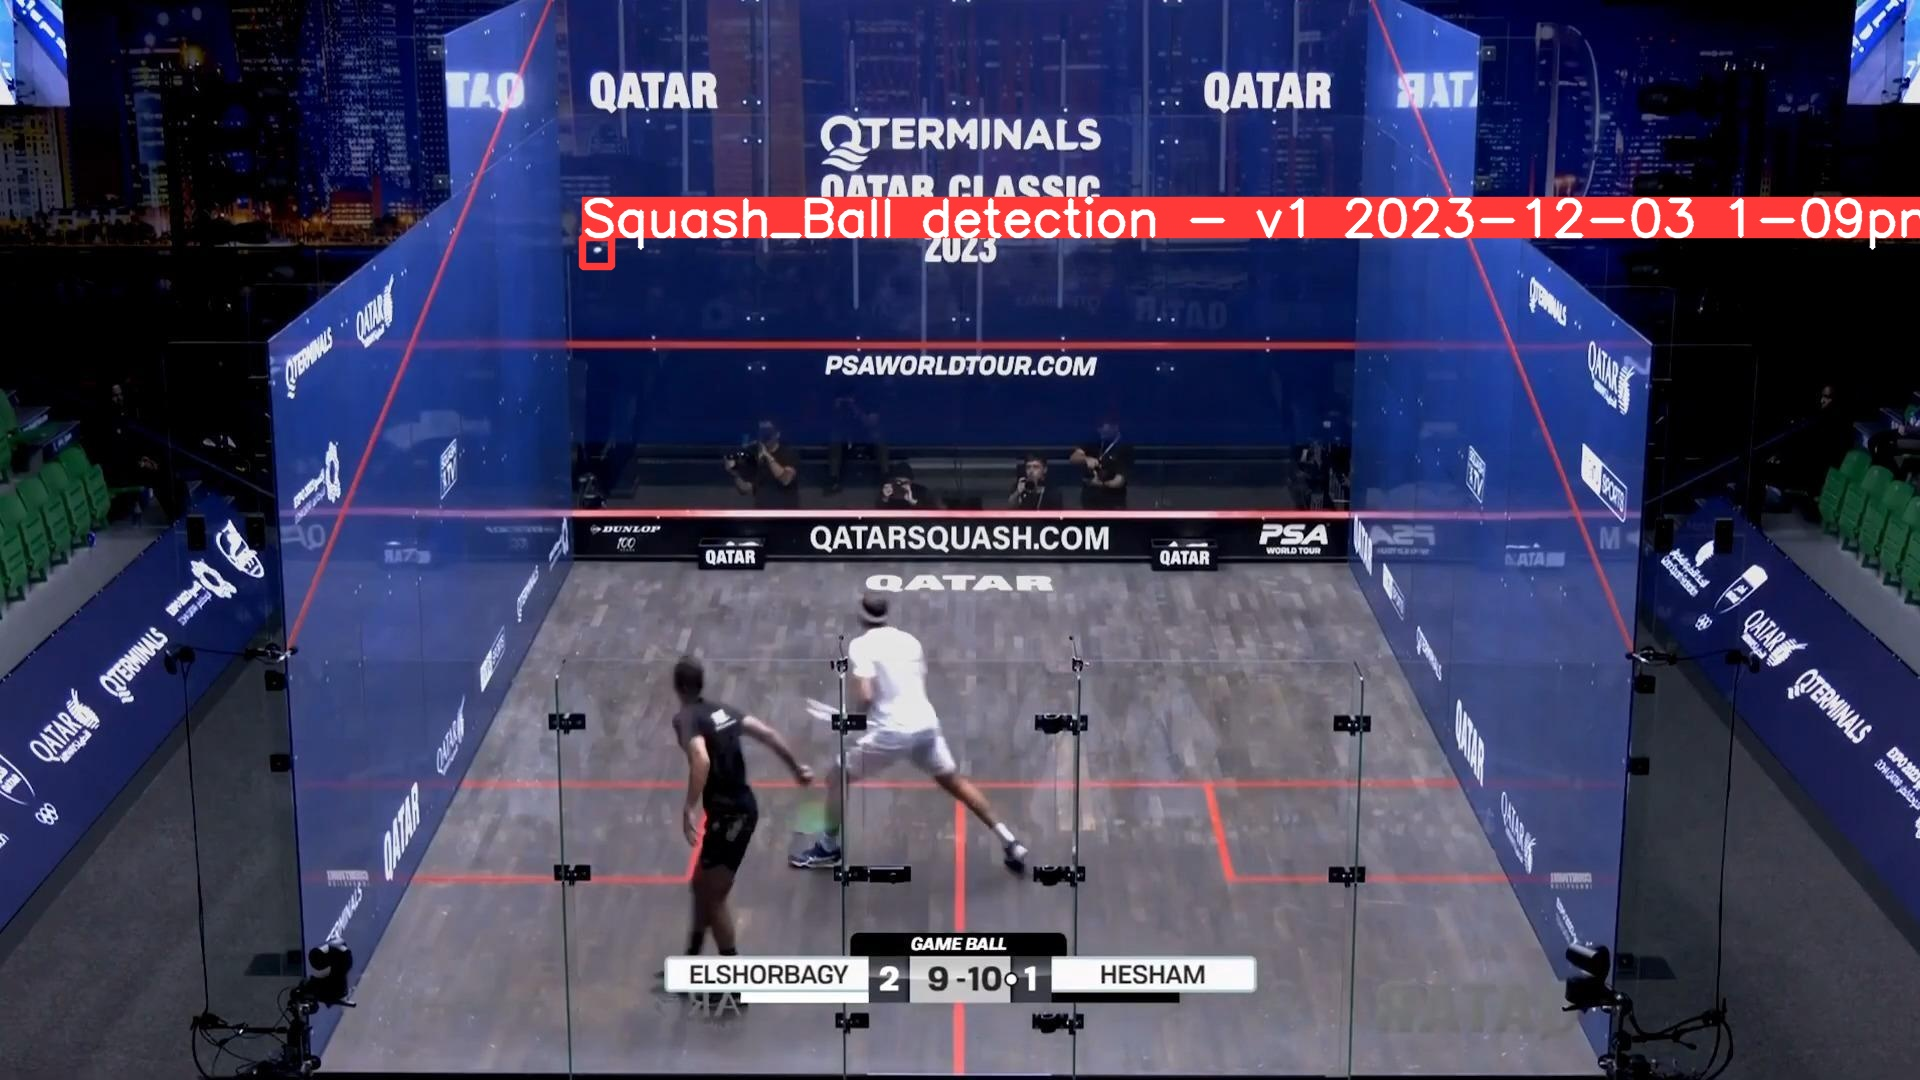

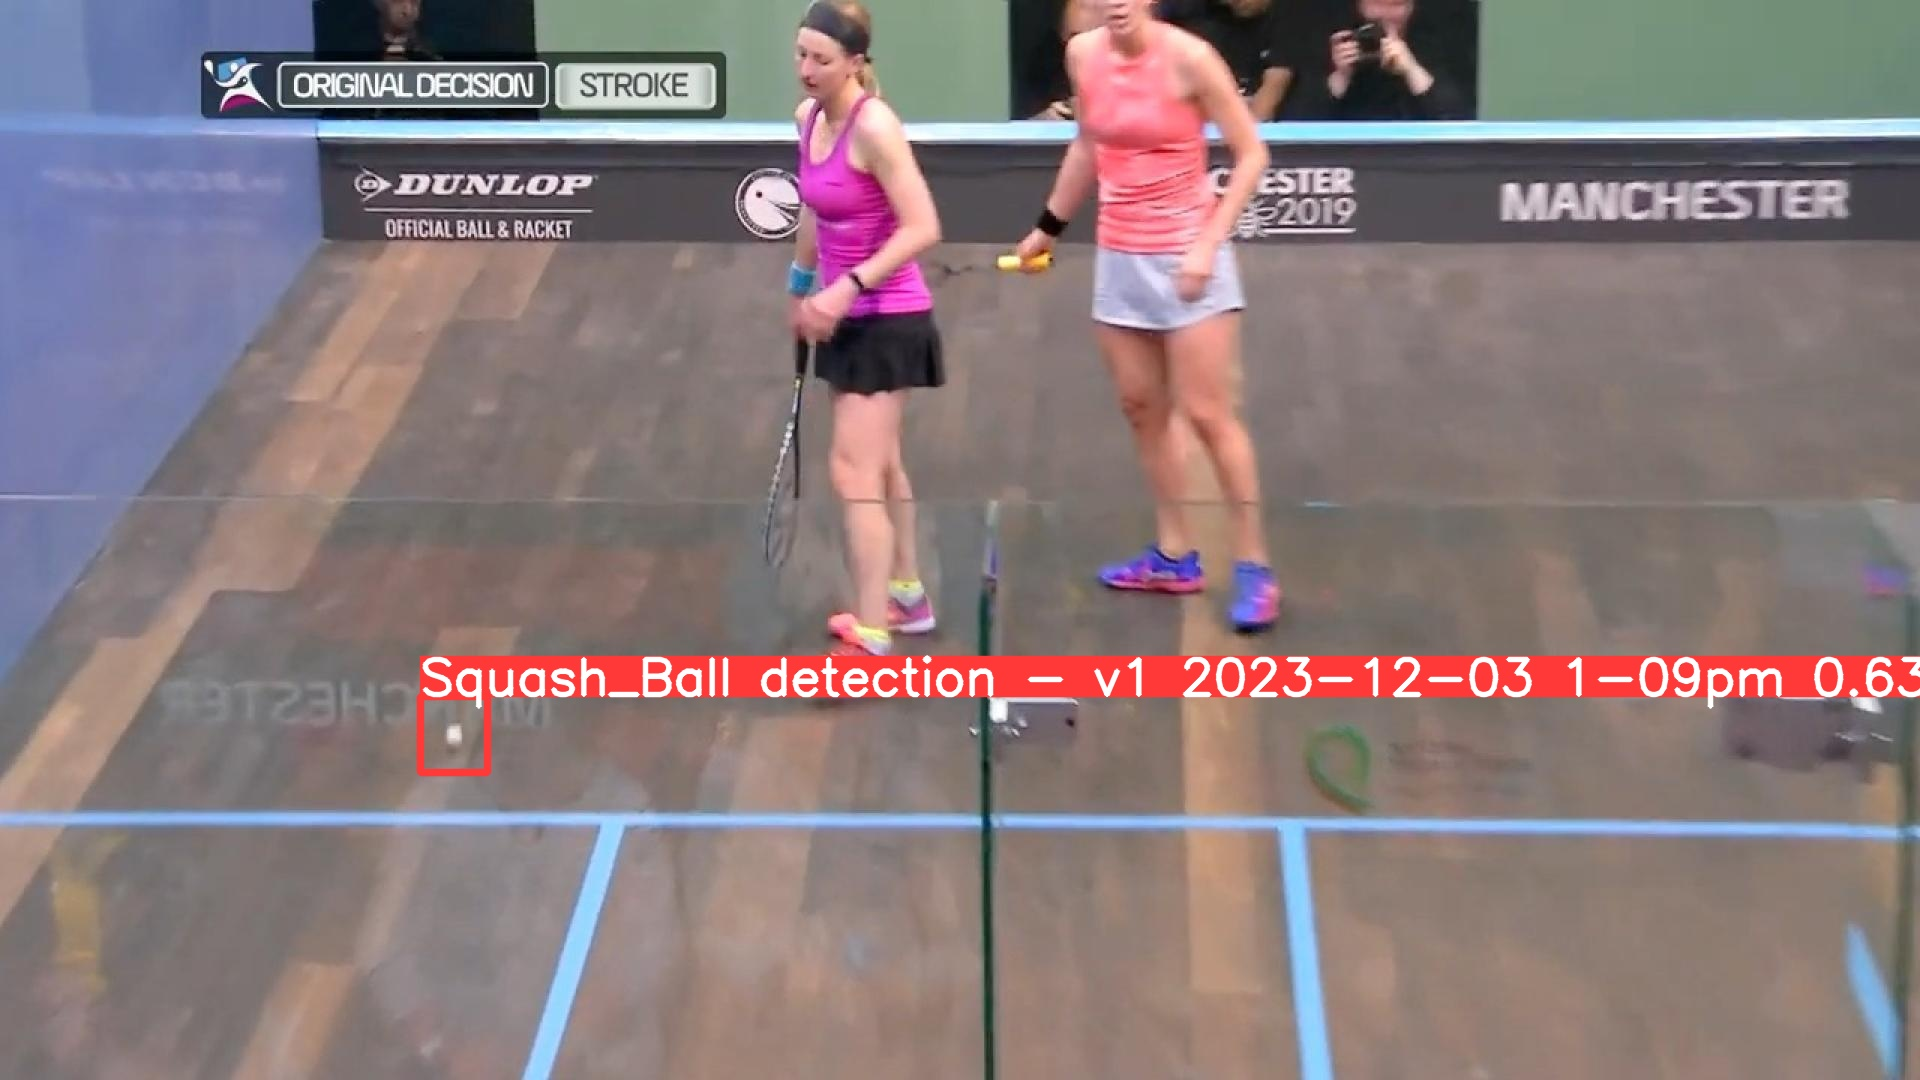

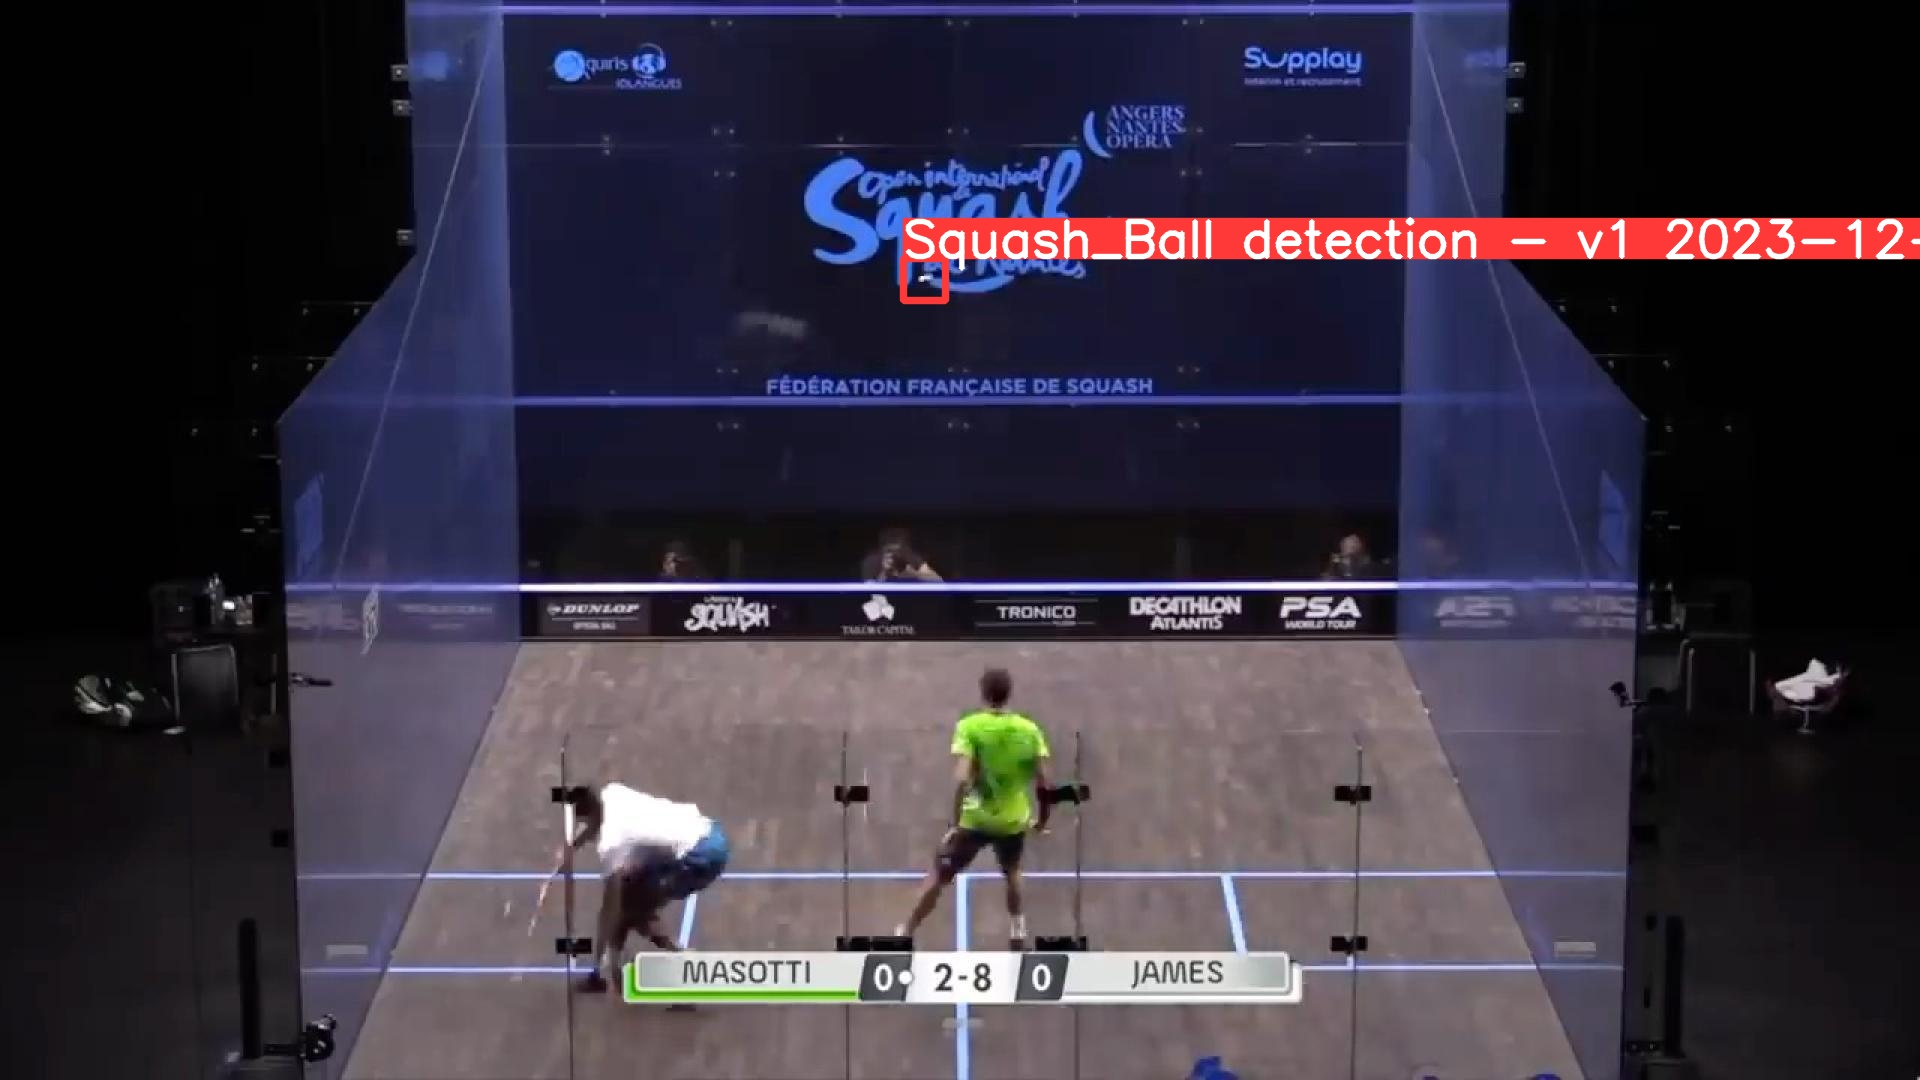

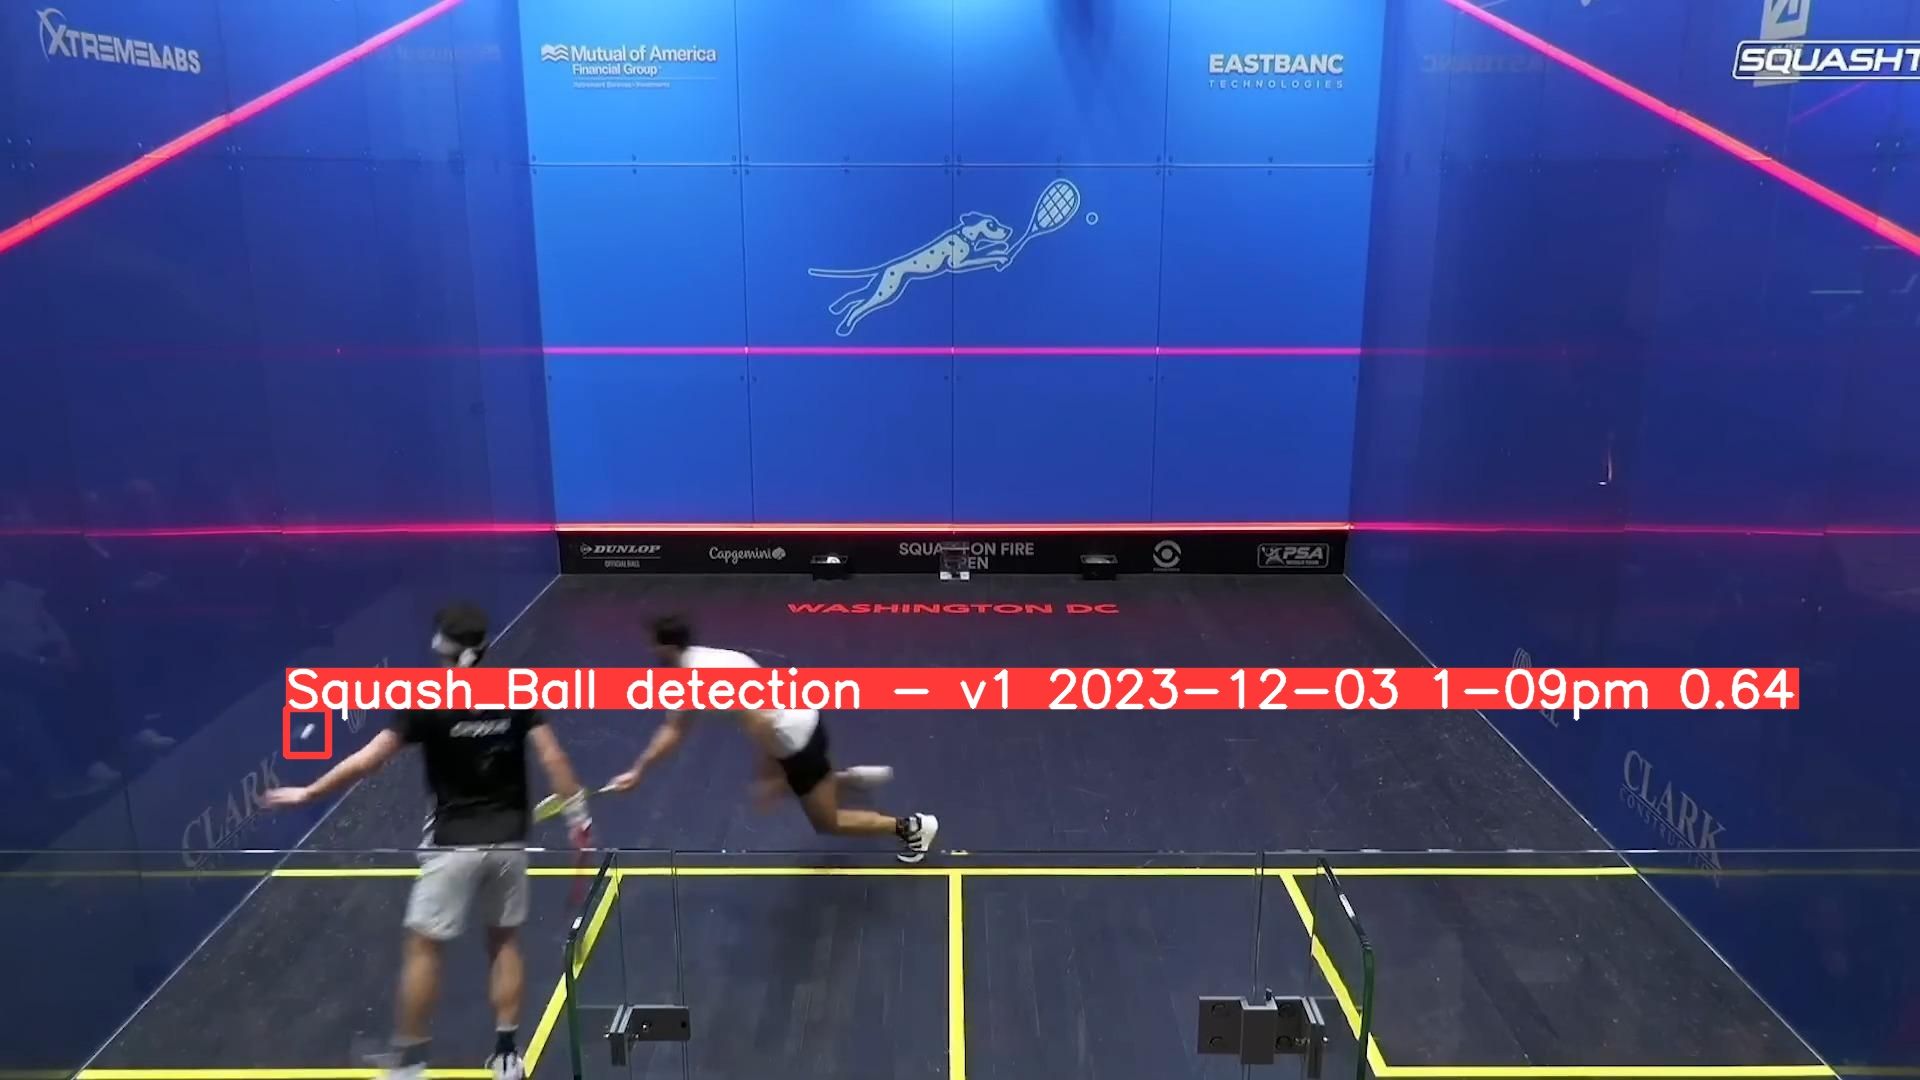

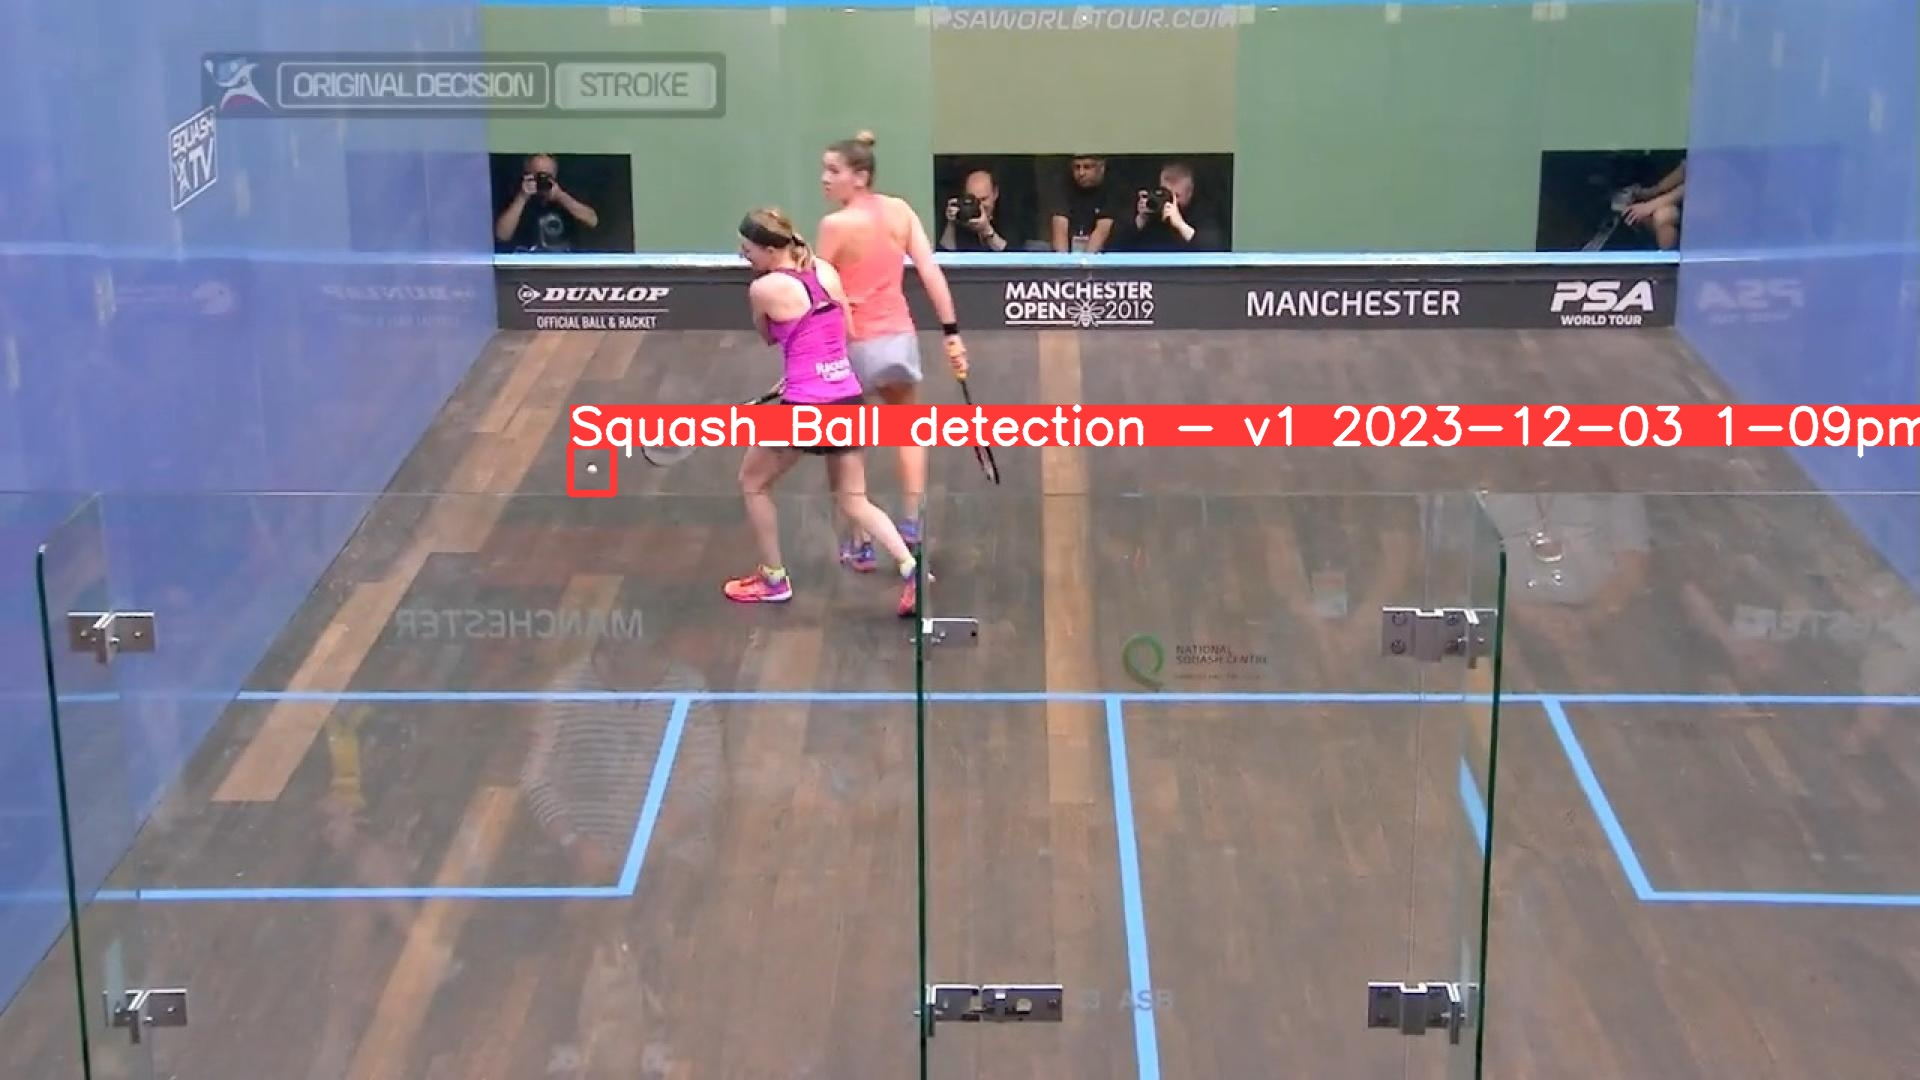

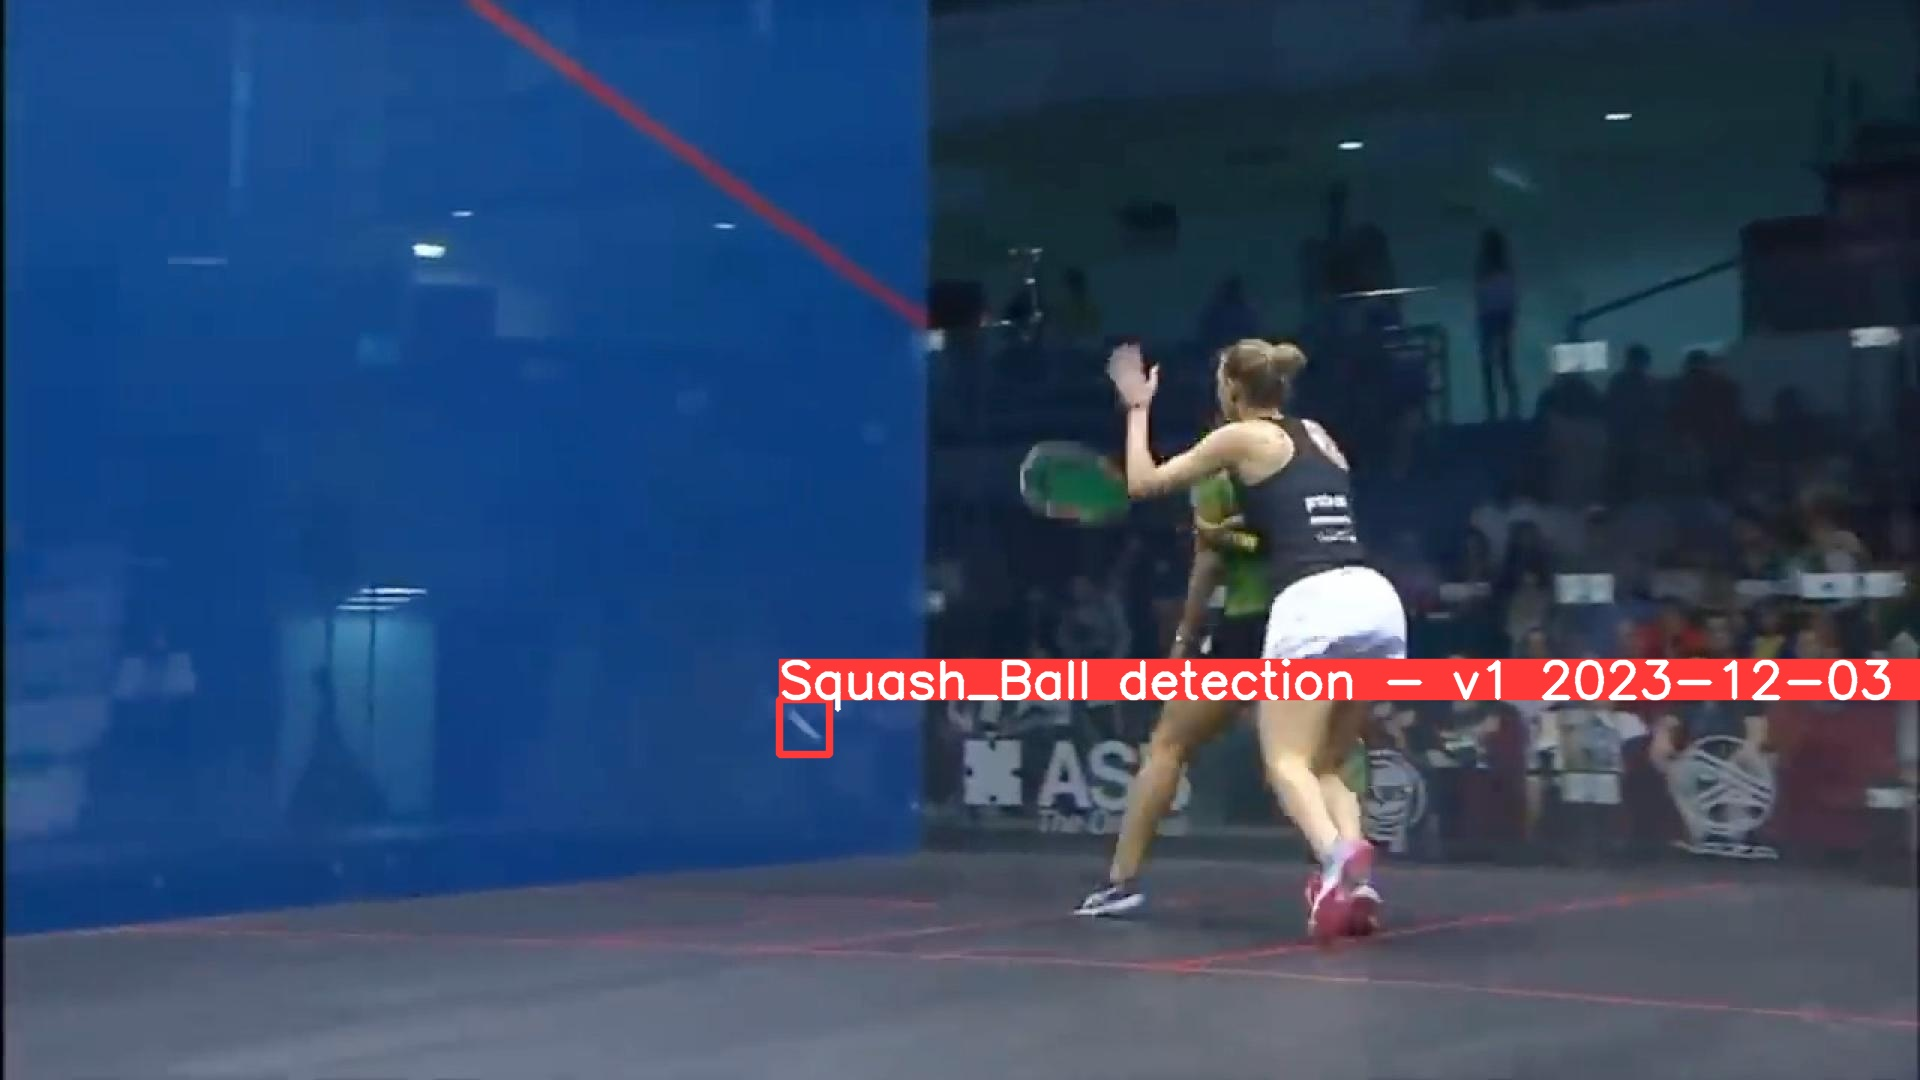

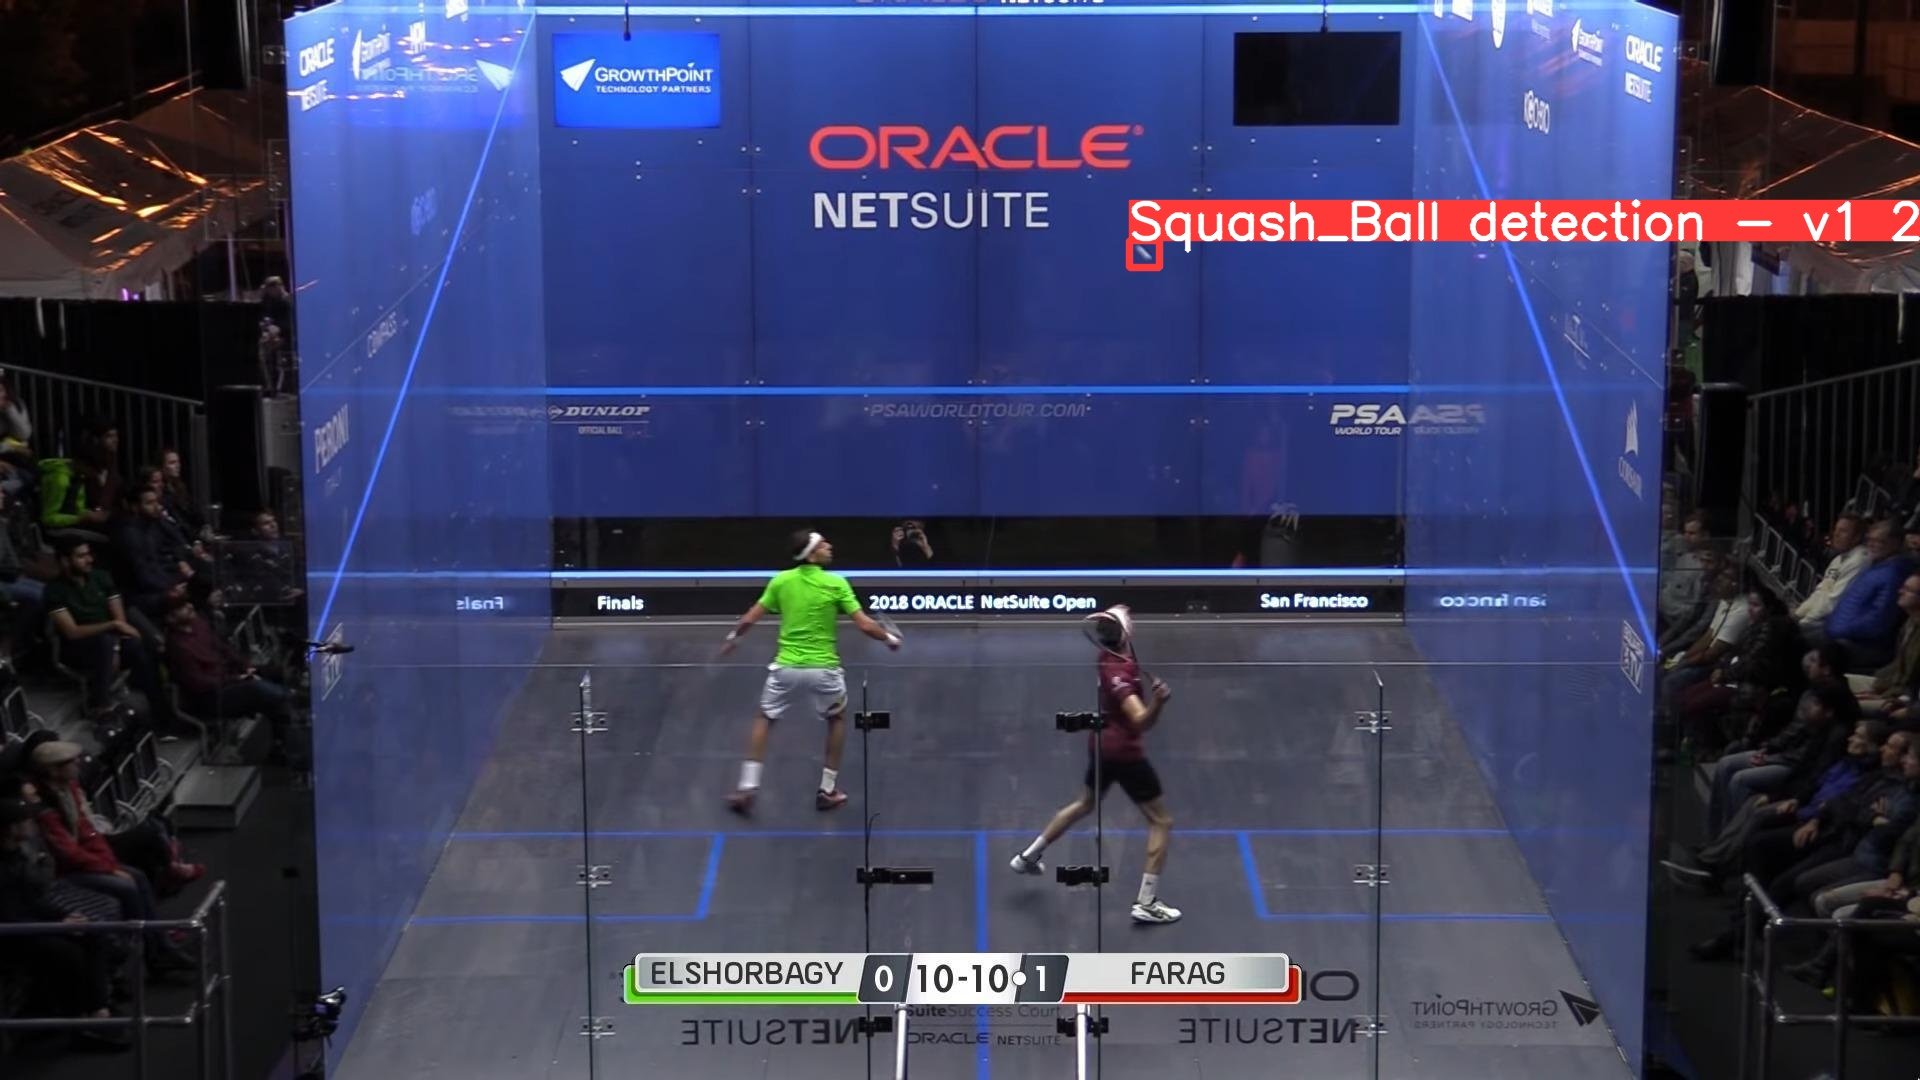

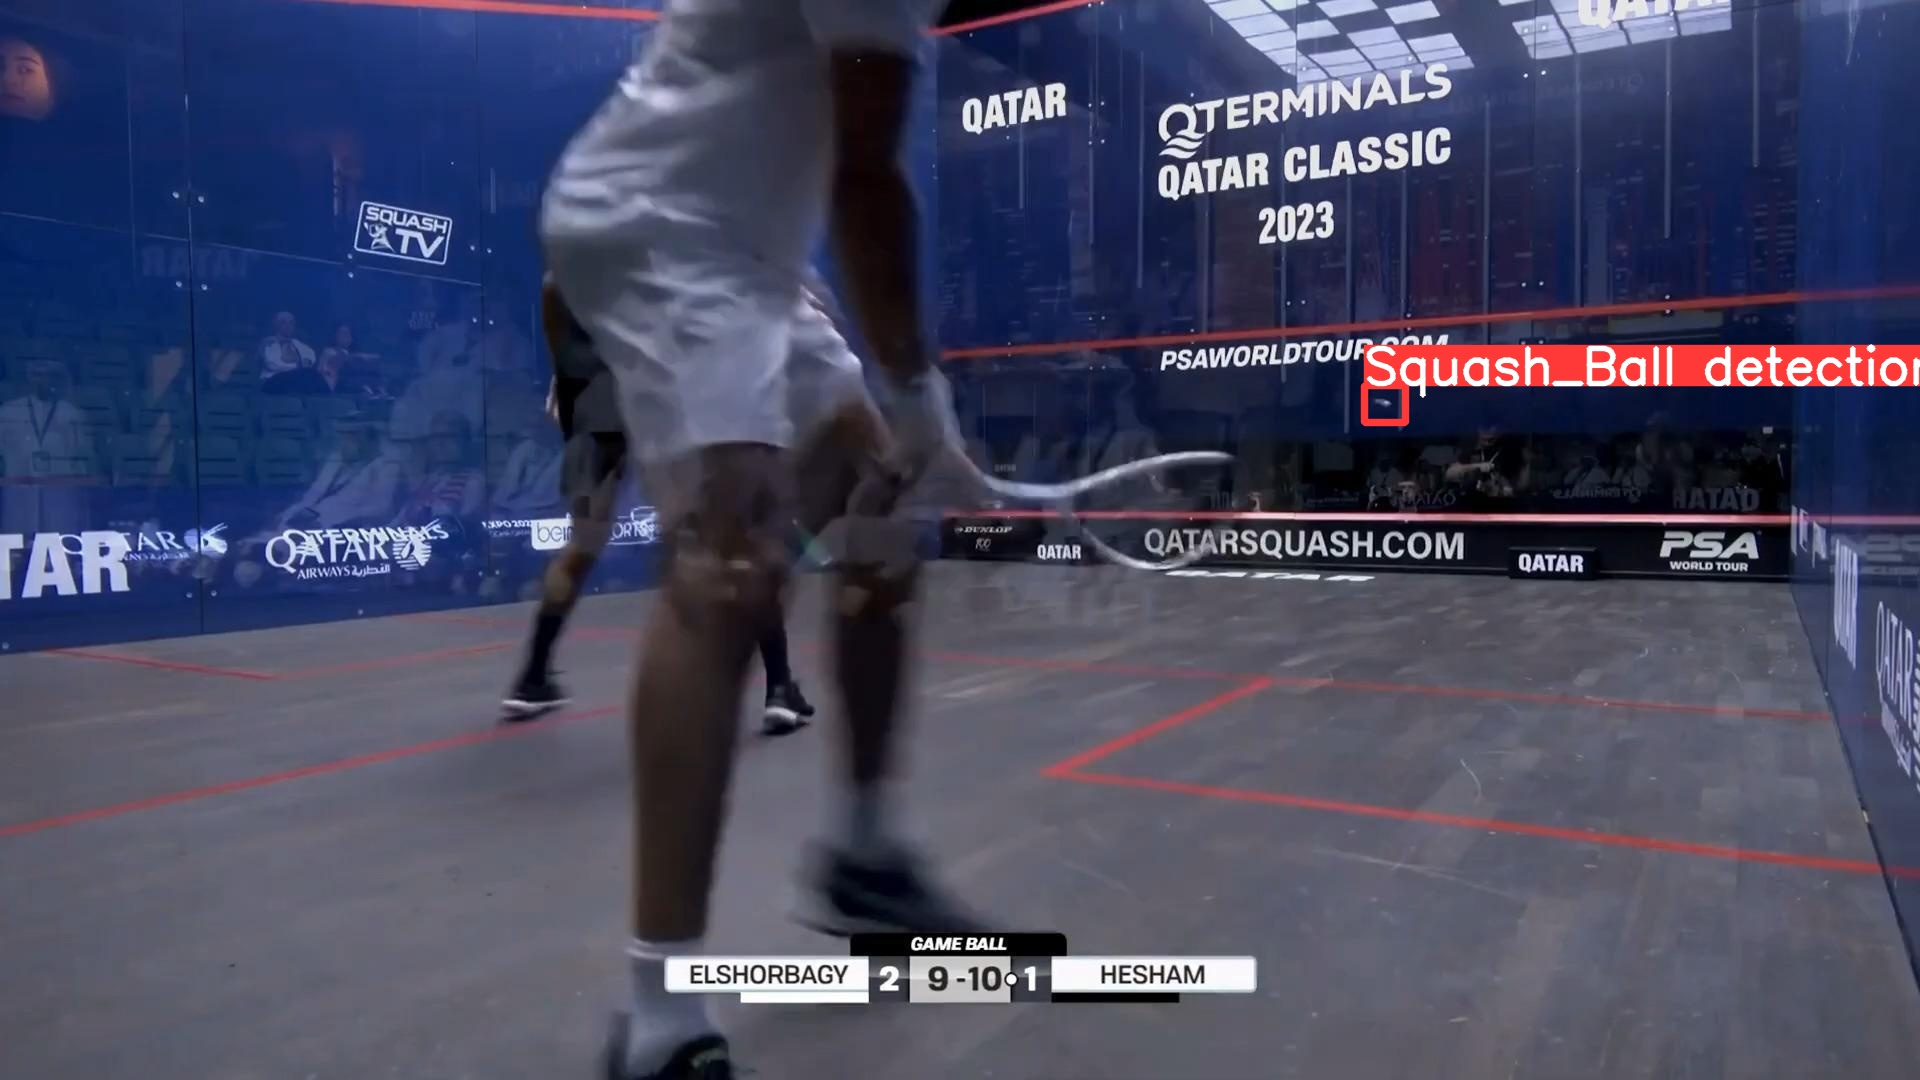

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
!zip -r /content/results.zip /content/datasets/runs/detect/train

  adding: content/datasets/runs/detect/train/ (stored 0%)
  adding: content/datasets/runs/detect/train/labels_correlogram.jpg (deflated 36%)
  adding: content/datasets/runs/detect/train/labels.jpg (deflated 32%)
  adding: content/datasets/runs/detect/train/weights/ (stored 0%)
  adding: content/datasets/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/datasets/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/datasets/runs/detect/train/val_batch0_labels.jpg (deflated 9%)
  adding: content/datasets/runs/detect/train/PR_curve.png (deflated 21%)
  adding: content/datasets/runs/detect/train/results.csv (deflated 84%)
  adding: content/datasets/runs/detect/train/train_batch3332.jpg (deflated 13%)
  adding: content/datasets/runs/detect/train/train_batch2.jpg (deflated 5%)
  adding: content/datasets/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
  adding: content/datasets/runs/detect/train/train_batch3330.jpg (deflated 12%)
  adding: content/datasets/runs

In [20]:
from google.colab import files
files.download("/content/results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
!zip -r /content/predictions.zip /content/runs/detect/predict

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Greatest-Squash-Trickshots_mp4-136_jpg.rf.27e25f64f5a3909a88d8339a4a0a036f.jpg (deflated 10%)
  adding: content/runs/detect/predict/Greatest-Squash-Trickshots_mp4-1226_jpg.rf.7acbc6e15e518d347628a26be7a1e3c5.jpg (deflated 9%)
  adding: content/runs/detect/predict/_This-is-a-JOKE_-Mazen-Hesham-and-Mohamed-Elshorbagy-in-Slow-Motion-_-4K-Slow-mo-Sunday-SQUASHTV-_mp4-676_jpg.rf.7d34595e939ecc1a019294e72205b8fe.jpg (deflated 4%)
  adding: content/runs/detect/predict/Squash-Refereeing_-Alison-Waters-v-Joelle-King-Stroke_mp4-1568_jpg.rf.cdb2f43ec72a27fdd5482baefdc698c0.jpg (deflated 6%)
  adding: content/runs/detect/predict/Greatest-Squash-Trickshots_mp4-31_jpg.rf.fc039f21649a848e737c457e58a0ed96.jpg (deflated 10%)
  adding: content/runs/detect/predict/Men-s-Shot-of-the-Season-2022-23-SQUASHTV-_mp4-739_jpg.rf.df476072d3b01d165b2cdc7358b6fc13.jpg (deflated 9%)
  adding: content/runs/detect/predict/Squash-R

In [22]:
files.download("/content/predictions.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>